In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from torch.utils.data import TensorDataset,DataLoader,Dataset
import torch.nn.functional as F

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset/Celsius to Fahrenheit/training.csv")
data.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [ ]:
data["Fahrenheit"] = data["Fahrenheit"].astype(int)

In [ ]:
data.shape

(16000, 2)

In [ ]:
data.isnull().sum()

Celsius       0
Fahrenheit    0
dtype: int64

In [ ]:
x=data.iloc[:,0].values
y=data.iloc[:,-1].values

In [ ]:
x

array([1169, 1280, 2380, ..., 1584, 2396,    0])

In [ ]:
y

array([2136, 2336, 4316, ..., 2883, 4344,   32])

In [ ]:
x_torch=torch.from_numpy(x.astype(np.float32)).view(-1,1)

In [ ]:
y_torch=torch.from_numpy(y.astype(np.float32)).view(-1,1)

In [ ]:
x_torch

tensor([[1169.],
        [1280.],
        [2380.],
        ...,
        [1584.],
        [2396.],
        [   0.]])

In [ ]:
y_torch

tensor([[2136.],
        [2336.],
        [4316.],
        ...,
        [2883.],
        [4344.],
        [  32.]])

In [ ]:
min_max=StandardScaler()
min_max2=StandardScaler()

In [ ]:
X=min_max.fit_transform(x.reshape(-1,1))
Y=min_max2.fit_transform(y.reshape(-1,1))
# Y=min_max2.fit_transform(y.reshape(len(y),1))[:,0]

In [ ]:
X[:-1]

array([[-0.11804244],
       [ 0.03478369],
       [ 1.54927691],
       ...,
       [-0.68528899],
       [ 0.45333454],
       [ 1.5713059 ]])

In [ ]:
Y[:-1]

array([[-0.1178899 ],
       [ 0.03508926],
       [ 1.54958296],
       ...,
       [-0.68544259],
       [ 0.45348727],
       [ 1.57100004]])

In [ ]:
X_train=torch.from_numpy(X.astype(np.float32)).view(-1,1)
Y_train=torch.from_numpy(Y.astype(np.float32)).view(-1,1)

In [ ]:
tensor_data=TensorDataset(X_train,Y_train)

In [ ]:
trainloader=DataLoader(tensor_data,batch_size=3,shuffle=True)

In [ ]:
X_train

tensor([[-0.1180],
        [ 0.0348],
        [ 1.5493],
        ...,
        [ 0.4533],
        [ 1.5713],
        [-1.7275]])

In [ ]:
Y_train

tensor([[-0.1179],
        [ 0.0351],
        [ 1.5496],
        ...,
        [ 0.4535],
        [ 1.5710],
        [-1.7272]])

In [ ]:
# class Neural(nn.Module):
#   def __init__(self,input_size,output_size):
#     super().__init__()
#     self.linear1=nn.Linear(input_size,output_size)
#     # self.linear2=nn.Linear(output_size,1)

#   def forward(self,x):
#     print("1: ",x)
#     x=nn.ReLU(self.linear1(x))
#     # print("2: ",x)
#     # x=nn.ReLU(self.linear2(x))
#     return x

In [ ]:
# model=Neural(1,1)

In [ ]:
# print(model(x_torch))

In [ ]:
class Neural2(nn.Module):
  def __init__(self,input_size):
    super().__init__()
    self.linear1=nn.Linear(input_size,32)
    self.linear2=nn.Linear(32,64)
    self.linear3=nn.Linear(64,128)
    self.linear4=nn.Linear(128,1)
 


  def forward(self,x):
    x=F.relu(self.linear1(x))
    x=F.relu(self.linear2(x))
    x=F.relu(self.linear3(x))
    # x=F.log_softmax(self.linear4(x))
    x=self.linear4(x)
    # x=nn.Softmax(dim=1)(x)
    
   
    return x

In [ ]:
class Neural2(nn.Module):
  def __init__(self,input_size):
    super().__init__()
    self.linear1=nn.Linear(input_size,32)
    # self.linear2=nn.Linear(32,64)
    # self.linear3=nn.Linear(64,128)
    self.linear4=nn.Linear(32,1)
 


  def forward(self,x):
    x=self.linear1(x)
    # x=self.linear2(x)
    # x=self.linear3(x)
    # x=F.log_softmax(self.linear4(x))
    x=self.linear4(x)
    # x=nn.Softmax(dim=1)(x)
    
   
    return x

In [ ]:
model=Neural2(1)

In [ ]:
for i in range(100):
  print(model(x_torch))

tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tensor([[ -67.9014],
        [ -74.3289],
        [-138.0253],
        ...,
        [ -91.9322],
        [-138.9518],
        [  -0.2095]], grad_fn=<AddmmBackward0>)
tens

In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [ ]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
total=0

for i in range(100):
  optimizer.zero_grad()
  output=model(X_train)
  loss=criterion(output,Y_train)

  loss.backward()

  optimizer.step()


 

  print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 0.0038823888171464205
epoch 1, loss 0.0036713494919240475
epoch 2, loss 0.0034718841779977083
epoch 3, loss 0.0032833556178957224
epoch 4, loss 0.0031051584519445896
epoch 5, loss 0.002936720382422209
epoch 6, loss 0.002777507295832038
epoch 7, loss 0.0026270048692822456
epoch 8, loss 0.002484731376171112
epoch 9, loss 0.0023502414114773273
epoch 10, loss 0.0022230963222682476
epoch 11, loss 0.002102893777191639
epoch 12, loss 0.0019892575219273567
epoch 13, loss 0.0018818187527358532
epoch 14, loss 0.0017802410293370485
epoch 15, loss 0.0016842004843056202
epoch 16, loss 0.0015933912945911288
epoch 17, loss 0.0015075274277478456
epoch 18, loss 0.0014263354241847992
epoch 19, loss 0.0013495605671778321
epoch 20, loss 0.0012769604800269008
epoch 21, loss 0.0012083075707778335
epoch 22, loss 0.00114338134881109
epoch 23, loss 0.0010819791350513697
epoch 24, loss 0.0010239091934636235
epoch 25, loss 0.0009689885773696005
epoch 26, loss 0.000917044177185744
epoch 27, loss 0.0

In [ ]:

model.train()

for i in range(100):
  train_running_loss=0
  train_running_acc=0
  loss_plt=[]
  acc_plt=[]
  for inputs,target in trainloader:
    # inputs,target=data[0],data[1]
    optimizer.zero_grad()
    output=model(inputs)
    loss=criterion(output,target.unsqueeze(0))
    acc=binary_acc(output,target.unsqueeze(0))
    loss.backward()
    optimizer.step()
    train_running_loss+=loss.item()
    train_running_acc+=acc.item()

    acc_plt.append(train_running_acc)
    loss_plt.append(train_running_loss)
  print(f'Epoch {i+0:03}: | Loss: {train_running_loss/len(trainloader):.5f} | Acc: {train_running_acc/len(trainloader):.3f}')



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 3, 1])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 000: | Loss: 0.00132 | Acc: 0.187
Epoch 001: | Loss: 0.00009 | Acc: 0.187
Epoch 002: | Loss: 0.00005 | Acc: 0.187
Epoch 003: | Loss: 0.00003 | Acc: 0.187
Epoch 004: | Loss: 0.00001 | Acc: 0.187
Epoch 005: | Loss: 0.00001 | Acc: 0.187
Epoch 006: | Loss: 0.00000 | Acc: 0.187
Epoch 007: | Loss: 0.00000 | Acc: 0.187
Epoch 008: | Loss: 0.00000 | Acc: 0.187
Epoch 009: | Loss: 0.00000 | Acc: 0.187
Epoch 010: | Loss: 0.00000 | Acc: 0.187
Epoch 011: | Loss: 0.00000 | Acc: 0.187
Epoch 012: | Loss: 0.00000 | Acc: 0.187
Epoch 013: | Loss: 0.00000 | Acc: 0.187
Epoch 014: | Loss: 0.00000 | Acc: 0.187
Epoch 015: | Loss: 0.00000 | Acc: 0.187
Epoch 016: | Loss: 0.00000 | Acc: 0.187
Epoch 017: | Loss: 0.00000 | Acc: 0.187
Epoch 018: | Loss: 0.00000 | Acc: 0.187
Epoch 019: | Loss: 0.00000 | Acc: 0.187
Epoch 020: | Loss: 0.00000 | Acc: 0.187
Epoch 021: | Loss: 0.00000 | Acc: 0.187
Epoch 022: | Loss: 0.00000 | Acc: 0.187
Epoch 023: | Loss: 0.00000 | Acc: 0.187
Epoch 024: | Loss: 0.00000 | Acc: 0.187


In [ ]:
data.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [ ]:
real_val_t=min_max.inverse_transform(X_train)

In [ ]:
X_train

tensor([[-0.1180],
        [ 0.0348],
        [ 1.5493],
        ...,
        [ 0.4533],
        [ 1.5713],
        [-1.7275]])

In [ ]:
real_val_t

array([[ 1.16900000e+03],
       [ 1.28000000e+03],
       [ 2.38000003e+03],
       ...,
       [ 1.58400000e+03],
       [ 2.39599998e+03],
       [-3.06101763e-05]])

In [ ]:
Y_train

tensor([[-0.1180],
        [ 0.0348],
        [ 1.5493],
        ...,
        [ 0.4533],
        [ 1.5713],
        [-1.7275]])

In [ ]:
y_val_t=min_max2.inverse_transform(Y_train)
y_val_t

array([[2136.20000193],
       [2335.99999811],
       [4316.0000554 ],
       ...,
       [2883.19999467],
       [4344.79996499],
       [  31.9999449 ]])

In [ ]:
predicted = model(X_train).detach().numpy()

In [ ]:
predicted

array([[-0.11619096],
       [ 0.03603999],
       [ 1.5446349 ],
       ...,
       [ 0.4529608 ],
       [ 1.566578  ],
       [-1.7194158 ]], dtype=float32)

In [ ]:
all_predict=min_max2.inverse_transform(predicted)

In [ ]:
all_predict=min_max2.inverse_transform(predicted)
len(all_predict)

16000

In [ ]:
data.head()

,Celsius,Fahrenheit
0,1169,2136
1,1280,2336
2,2380,4316
3,1508,2746
4,2015,3659


In [ ]:
predict=pd.DataFrame(data={"Celsius":torch.tensor(data["Celsius"]).flatten(),"Fahrenheit":torch.tensor(data["Fahrenheit"]).flatten(),"Predict":all_predict.flatten()})

In [ ]:
predict

,Celsius,Fahrenheit,Predict
0,1169,2136,2138.221191
1,1280,2336,2337.242920
2,2380,4316,4309.531250
3,1508,2746,2746.044678
4,2015,3659,3655.090088
...,...,...,...
15995,833,1531,1535.776855
15996,757,1394,1399.509766
15997,1584,2883,2882.311768
15998,2396,4344,4338.218750


In [ ]:
x=torch.Tensor([10])

In [ ]:
a=model(x).data.numpy()
a

array([9.380795], dtype=float32)

In [ ]:
min_max2.inverse_transform(a.reshape(-1,1))

array([[14554.271]], dtype=float32)

In [ ]:
a=data["Celsius"]

In [ ]:
all_predict

array([[2223.1338 ],
       [2403.1858 ],
       [4187.4834 ],
       ...,
       [2896.3008 ],
       [4213.437  ],
       [ 326.91174]], dtype=float32)

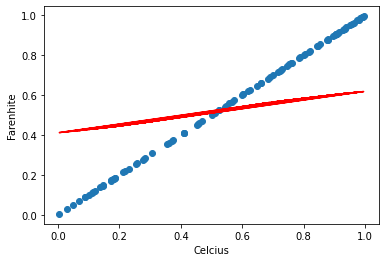

In [ ]:
plt.scatter(X_train.detach().numpy()[:100] , Y_train.detach().numpy()[:100])
plt.plot(X_train.detach().numpy()[:100] , predicted[:100] , "red")
plt.xlabel("Celcius")
plt.ylabel("Farenhite")
plt.show()

In [ ]:
total=0
for i in range(500):
  output=model(X_train)
  loss=criterion(output,Y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

 

  print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 0.05134893208742142
epoch 1, loss 0.05115901678800583
epoch 2, loss 0.05096929892897606
epoch 3, loss 0.05077976733446121
epoch 4, loss 0.05059041082859039
epoch 5, loss 0.05040126293897629
epoch 6, loss 0.050212327390909195
epoch 7, loss 0.05002354457974434
epoch 8, loss 0.04983493685722351
epoch 9, loss 0.049646493047475815
epoch 10, loss 0.04945821315050125
epoch 11, loss 0.04927009716629982
epoch 12, loss 0.04908212646842003
epoch 13, loss 0.048894330859184265
epoch 14, loss 0.04870672896504402
epoch 15, loss 0.04851926863193512
epoch 16, loss 0.048331983387470245
epoch 17, loss 0.048144835978746414
epoch 18, loss 0.047957856208086014
epoch 19, loss 0.04777108505368233
epoch 20, loss 0.047584448009729385
epoch 21, loss 0.04739798605442047
epoch 22, loss 0.04721170291304588
epoch 23, loss 0.04702557250857353
epoch 24, loss 0.04683960601687431
epoch 25, loss 0.046653784811496735
epoch 26, loss 0.04646812751889229
epoch 27, loss 0.04628261551260948
epoch 28, loss 0.04609

In [ ]:
predicted = model(X_train).detach().numpy()

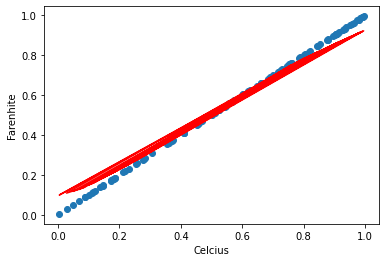

In [ ]:
plt.scatter(X_train.detach().numpy()[:100] , Y_train.detach().numpy()[:100])
plt.plot(X_train.detach().numpy()[:100] , predicted[:100] , "red")
plt.xlabel("Celcius")
plt.ylabel("Farenhite")
plt.show()

In [ ]:
total=0
for i in range(1500):
  output=model(X_train)
  loss=criterion(output,Y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

 
  print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 0.0012052578385919333
epoch 1, loss 0.0011928414460271597
epoch 2, loss 0.0011805600952357054
epoch 3, loss 0.0011684101773425937
epoch 4, loss 0.0011563933221623302
epoch 5, loss 0.0011445073178038
epoch 6, loss 0.001132751815021038
epoch 7, loss 0.0011211242526769638
epoch 8, loss 0.0011096236994490027
epoch 9, loss 0.001098248758353293
epoch 10, loss 0.0010869979159906507
epoch 11, loss 0.0010758719872683287
epoch 12, loss 0.0010648686438798904
epoch 13, loss 0.0010539846261963248
epoch 14, loss 0.0010432209819555283
epoch 15, loss 0.0010325770126655698
epoch 16, loss 0.0010220499243587255
epoch 17, loss 0.0010116390185430646
epoch 18, loss 0.0010013437131419778
epoch 19, loss 0.0009911623783409595
epoch 20, loss 0.0009810947813093662
epoch 21, loss 0.0009711379534564912
epoch 22, loss 0.0009612931753508747
epoch 23, loss 0.0009515577694401145
epoch 24, loss 0.000941929523833096
epoch 25, loss 0.0009324098937213421
epoch 26, loss 0.0009229968418367207
epoch 27, loss 0.

In [ ]:
predicted = model(X_train).detach().numpy()

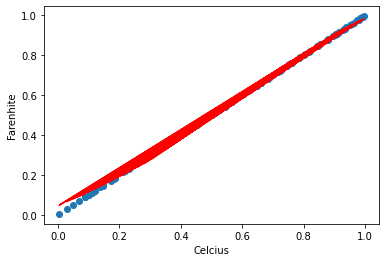

In [ ]:
plt.scatter(X_train.detach().numpy()[:100] , Y_train.detach().numpy()[:100])
plt.plot(X_train.detach().numpy()[:100] , predicted[:100] , "red")
plt.xlabel("Celcius")
plt.ylabel("Farenhite")
plt.show()

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/dataset/Celsius to Fahrenheit/testing.csv")
test.head()

,Celsius,Fahrenheit
0,259,NaN
1,2351,NaN
2,2112,NaN
3,2239,NaN
4,1016,NaN


In [ ]:
test.isnull().sum()

Celsius          0
Fahrenheit    8000
dtype: int64

In [ ]:
test.shape

(8000, 2)

In [ ]:
x=torch.Tensor([2380])

In [ ]:
predicted2 = model(x).detach().numpy()

In [ ]:
predicted2

array([230.19376], dtype=float32)

In [ ]:
X_train

tensor([[0.4676],
        [0.5120],
        [0.9520],
        ...,
        [0.6336],
        [0.9584],
        [0.0000]])

In [ ]:
Y_train

tensor([[0.4676],
        [0.5120],
        [0.9520],
        ...,
        [0.6336],
        [0.9584],
        [0.0000]])